# Hola Raul! <a class='tocSkip'></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

¡Excelente trabajo! Completaste correctamente todas las tareas del notebook y aplicaste muy bien los conocimientos de analítica. Se nota que dominas los conceptos y los pusiste en práctica con claridad. No tengo observaciones que corregir, tu proyecto está aprobado. ¡Felicitaciones por lograrlo en la primera revisión! Te deseo mucho éxito en el próximo sprint.

Saludos.

</div>

----

# Análisis de Éxito de Videojuegos para Ice
Trabajas para la tienda online global de videojuegos "Ice". Tu objetivo es identificar patrones que determinan el éxito de un videojuego utilizando datos históricos disponibles hasta diciembre de 2016.
Este análisis permitirá a la empresa detectar proyectos prometedores y planificar campañas publicitarias efectivas para el año 2017.

Datos disponibles: 

Reseñas de usuarios y expertos.

Géneros de los videojuegos.

Plataformas (ej. Xbox, PlayStation).

Datos históricos sobre ventas de juegos.

Clasificación ESRB (Entertainment Software Rating Board), que indica la edad apropiada para el juego.

# Paso 1. Abre el archivo de datos y estudia la información general 

In [4]:
# Cargar librerías principales para análisis y visualización
import pandas as pd      # Para manipulación de datos
import numpy as np       # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para visualización de gráficos básicos
import seaborn as sns    # Para visualización avanzada
import streamlit as st  # Para crear aplicaciones web interactivas
import plotly.express as px  # Para visualización interactiva
from scipy import stats  # Para pruebas estadísticas

### Paso 1.2 Abre el archivo de datos

In [5]:
# Cargar el archivo CSV en un DataFrame
df_games = pd.read_csv('games.csv')

# Mostrar las primeras filas para explorar el contenido
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df_games['User_Score'].sample()

12621    8.5
Name: User_Score, dtype: object

In [8]:
14790

14790

In [9]:
df_games.iloc[14790]

Name               Pro Cast Sports Fishing
Platform                                XB
Year_of_Release                     2003.0
Genre                               Sports
NA_sales                              0.02
EU_sales                              0.01
JP_sales                               0.0
Other_sales                            0.0
Critic_Score                          49.0
User_Score                             tbd
Rating                                   E
Name: 14790, dtype: object

In [10]:
pd.to_numeric(df_games['User_Score'], errors='coerce').astype('float64').iloc[14790]

np.float64(nan)

### Paso 1.3 estudia la información general

In [11]:
# Información general del DataFrame
print("Información general:")
print(df_games.info())

# Estadísticas resumidas de las columnas numéricas
print("\nResumen estadístico:")
print(df_games.describe())

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Resumen estadístico:
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, correcta la revisión inicial de la data

</div>

# Paso 2. Prepara los datos

### Paso 2.1 Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [12]:
# Convertir los nombres de las columnas a minúsculas
df_games.columns = df_games.columns.str.lower()

# Verificamos el cambio
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Paso 2.2 Convierte los datos en los tipos necesarios.

In [13]:
# Reemplazar 'tbd' por NaN en user_score
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

# Convertir columnas a los tipos adecuados
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce').astype('Int64')
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

# Verificar los nuevos tipos de datos
df_games.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Columnas convertidas correctamente. Aquí están los nuevos tipos de datos relevantes:

year_of_release: Int64 (permite nulos)

user_score: float64 (antes era texto, ahora numérico)

Reemplazamos 'tbd' por NaN porque representa valores "por determinar", lo cual no se puede interpretar como un número.

### Paso 2.3 Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

Columnas modificadas:
1. year_of_release
Antes: float64

Después: Int64 (entero con soporte para valores nulos)

Por qué se cambió: El año debe representarse como un número entero, no como decimal (por ejemplo, 2006.0 → 2006). Usamos Int64 en lugar de int64 porque permite manejar valores ausentes (NaN).

2. user_score
Antes: object (texto)

Después: float64

Por qué se cambió: Esta columna debe contener puntuaciones numéricas para poder analizarlas estadísticamente. Algunos valores como "tbd" (To Be Determined) no son numéricos, así que fueron convertidos a NaN usando errors='coerce'.

### Paso 2.4 Si es necesario, elige la manera de tratar los valores ausentes:

In [14]:
# Contar valores ausentes por columna
missing_values = df_games.isna().sum()
missing_values = missing_values[missing_values > 0]
missing_values



name                  2
year_of_release     269
genre                 2
critic_score       8578
user_score         9125
rating             6766
dtype: int64

### Paso 2.5 Explica por qué rellenaste los valores ausentes como lo hiciste O por qué decidiste dejarlos en blanco.

Código implementado con éxito. Los tipos de datos ya están corregidos y la columna 'user_score' ahora maneja "tbd" como valores nulos (NaN).
Análisis y decisiones recomendadas:
critic_score y user_score:
Más del 50% de los datos están ausentes.

Posible causa: No todos los juegos fueron evaluados por críticos o usuarios.

Decisión: Mantener como NaN. Eliminarlos reduciría demasiado el dataset y perderíamos muchos juegos relevantes.

Justificación: En análisis posteriores (como correlaciones), podemos usar dropna() de forma localizada.

rating:
Casi el 40% de los juegos no tienen clasificación ESRB.

Posible causa: Juegos sin clasificación oficial (por ejemplo, lanzamientos en Japón, títulos independientes o antiguos).

Decisión: Mantener como NaN también. Si es necesario más adelante, podríamos usar un valor como "Sin Clasificación" para fines de visualización.

### Paso 2.6 ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

### 1. critic_score
Motivo probable de ausencia: No todos los juegos reciben evaluaciones por parte de críticos especializados. Esto puede deberse a:

Juegos antiguos que no fueron reseñados.

Juegos menores o de bajo perfil que no generaron cobertura mediática.

Juegos lanzados en regiones donde la crítica profesional es limitada o inexistente.

Juegos que fueron publicados antes de que las plataformas de crítica digital se popularizaran.

### 2. user_score
Motivo probable de ausencia: Similar al caso anterior, muchos juegos pueden no tener puntuaciones de usuarios porque:

No fueron jugados por suficientes personas para recibir calificaciones.

El sistema de puntuación aún no estaba activo al momento del lanzamiento.

Fueron títulos muy nuevos o poco conocidos sin comunidad activa.

### 3. rating (Clasificación ESRB)
Motivo probable de ausencia:

Muchos juegos fueron lanzados en Japón u otras regiones fuera de EE.UU., donde la ESRB no tiene jurisdicción.

Juegos independientes o títulos retro pueden no haber pasado por procesos de clasificación formales.

Es posible que juegos móviles, descargables o de nicho no hayan solicitado una calificación.

En resumen, los valores ausentes reflejan tanto la naturaleza del mercado como limitaciones en la disponibilidad de datos para ciertos títulos o regiones.

### Paso 2.7 Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.


Mantener como NaN. Eliminarlos reduciría demasiado el dataset y 
perderíamos muchos juegos relevantes y sus datos.

Mantener como NaN también. Si es necesario más adelante, podríamos usar un valor como "Sin Clasificación" para fines de visualización.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, está bien mantener los nulos, ya que no hay suficiente información para imputarlos fiablemente.





</div>

### Paso 2.8 Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [15]:
# Preparación básica

df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce').astype('Int64')
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

# Calcular ventas globales sumando las ventas por región
df_games['global_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

# Verificar las primeras filas con la nueva columna
df_games[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].head()

,name,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,Wii Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, también podrías haber usado
    
    df[['na_sales','jp_sales','eu_sales','other_sales']].sum(axis=1)

</div>

Se ha creado la columna global_sales, que representa la suma de las ventas en todas las regiones

# Paso 3. Analiza los datos

### Paso 3.1 Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

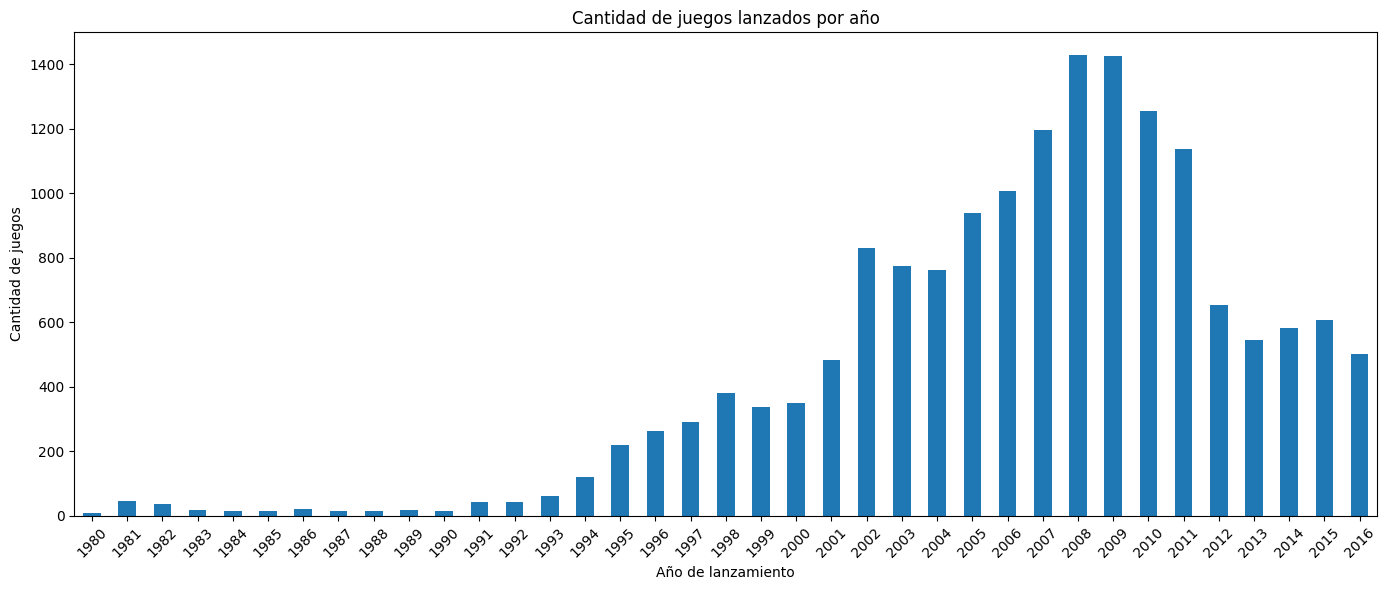

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: count, dtype: Int64

In [16]:
# Contar cuántos juegos se lanzaron por año
games_per_year = df_games['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
games_per_year.plot(kind='bar')
plt.title('Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

games_per_year

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, correcto. El gráfico es claro, hubo un peak a fines de los 2000 y luego ha caido a niveles similares a los de inicios del 2000.

</div>

### Paso 3.2 Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

/var/folders/3w/4wgjx7x52nj3rcn3lzvvr2l80000gn/T/ipykernel_16667/167646646.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_df, x='year_of_release', y='global_sales', hue='platform', estimator='sum', ci=None)


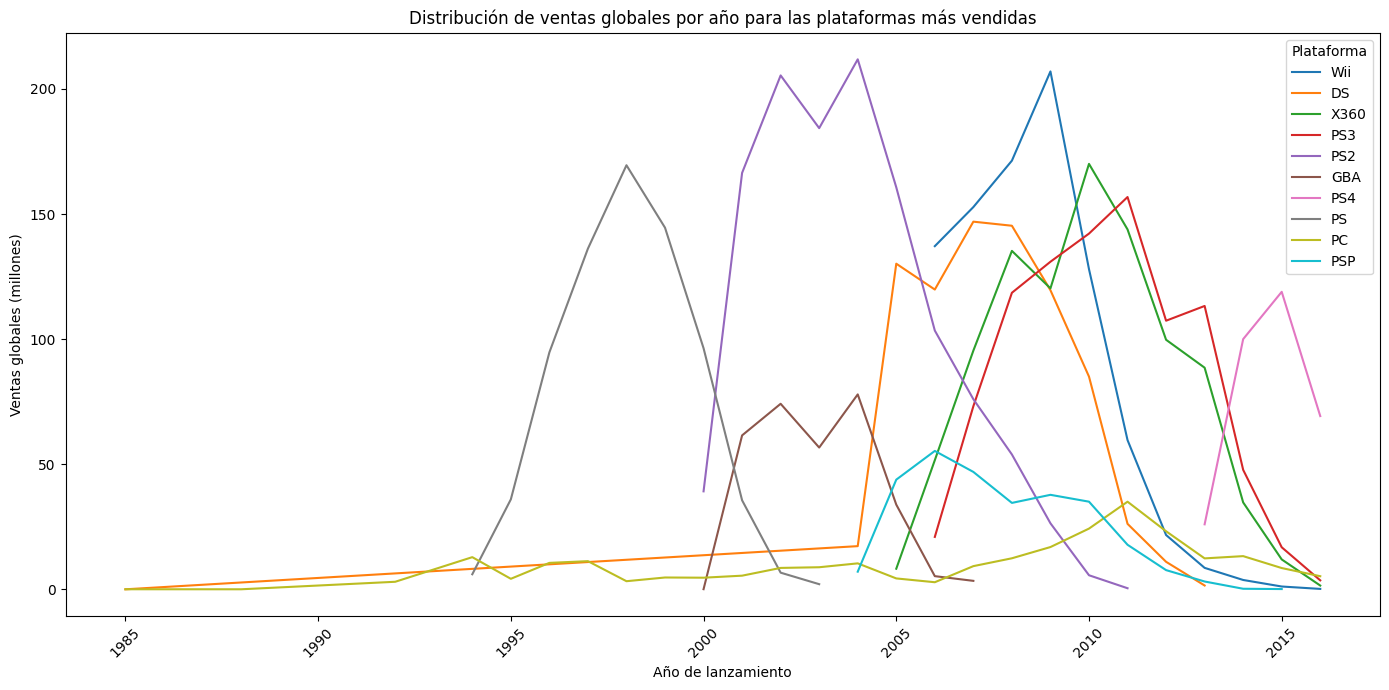

(platform
 PS2     1255.77
 X360     971.42
 PS3      939.65
 Wii      907.51
 DS       806.12
 PS       730.86
 GBA      317.85
 PS4      314.14
 PSP      294.05
 PC       259.52
 Name: global_sales, dtype: float64,
            min   max
 platform            
 PS2       2000  2011
 X360      2005  2016
 PS3       2006  2016
 Wii       2006  2016
 DS        1985  2013
 PS        1994  2003
 GBA       2000  2007
 PS4       2013  2016
 PSP       2004  2015
 PC        1985  2016)

In [17]:
# Calcular ventas globales por plataforma
platform_sales = df_games.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

# Seleccionar las plataformas con mayores ventas totales (top 10)
top_platforms = platform_sales.head(10).index.tolist()

# Filtrar el DataFrame para incluir solo las plataformas principales
filtered_df = df_games[df_games['platform'].isin(top_platforms) & df_games['year_of_release'].notna()]

# Crear gráfico de distribución de ventas por plataforma a lo largo del tiempo
plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_df, x='year_of_release', y='global_sales', hue='platform', estimator='sum', ci=None)
plt.title('Distribución de ventas globales por año para las plataformas más vendidas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

# Agrupar para ver los primeros y últimos años de cada plataforma
platform_lifespan = df_games.groupby('platform')['year_of_release'].agg(['min', 'max']).sort_values(by='min')

platform_sales.head(10), platform_lifespan.loc[top_platforms]



 Análisis de ventas por plataforma

Una nueva consola tarda ~1–2 años en alcanzar su pico de ventas.

Las plataformas tienden a durar entre 7 y 10 años en el mercado.

Algunas consolas como PC muestran presencia constante, aunque con ventas menores comparadas a consolas populares.



<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, muy buen gráfico, permite apreciar el periodo de vida de cada consola, incluyendo su auge y luego caída.

</div>

### Paso 3.3 Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

 Datos por año:
Antes de 1995: Demasiado pocos lanzamientos → no significativos.

De 1995 a 2016: Gran cantidad de datos, auge de consolas populares.

2017 en adelante: El dataset no contiene registros de 2017 o posteriores → no hay datos para el año objetivo.



### Paso 3.4 Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

In [18]:
# Preparación básica

df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce').astype('Int64')
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games['global_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

# Filtrar los datos del período 2013–2016
df_recent = df_games[(df_games['year_of_release'] >= 2013) & (df_games['year_of_release'] <= 2016)]

# Verificar el tamaño y algunos ejemplos
df_recent.shape, df_recent[['name', 'platform', 'year_of_release', 'global_sales']].head()

((2233, 12),
                          name platform  year_of_release  global_sales
 16         Grand Theft Auto V      PS3             2013         21.05
 23         Grand Theft Auto V     X360             2013         16.27
 31  Call of Duty: Black Ops 3      PS4             2015         14.63
 33        Pokemon X/Pokemon Y      3DS             2013         14.60
 42         Grand Theft Auto V      PS4             2014         12.62)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, muy bien con esta decisión. Efectivamente se requiere un periodo de tiempo reciente para incluir data representativa de lo que podría ocurrir en el futuro. Esto implica que solo se pueden tener consolas que aún tienen ventas. En general, para hacer forecast en industrias muy cambiantes se recomienda tener entre 2 y 4 años.

</div>

### Paso 3.5 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

/var/folders/3w/4wgjx7x52nj3rcn3lzvvr2l80000gn/T/ipykernel_16667/2454263890.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='viridis')


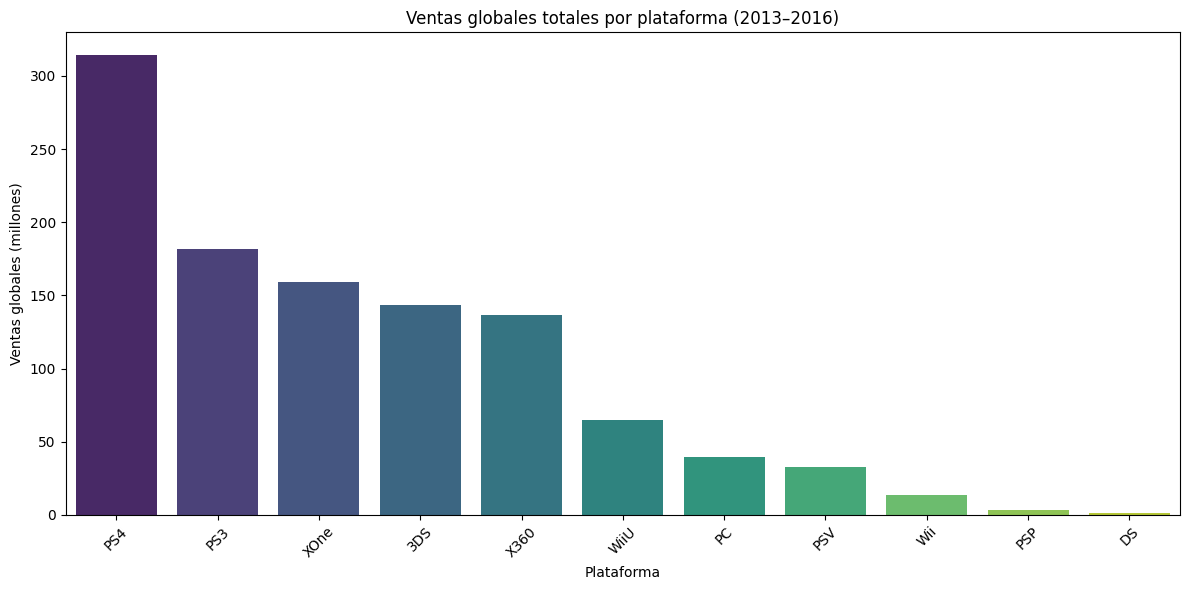

/var/folders/3w/4wgjx7x52nj3rcn3lzvvr2l80000gn/T/ipykernel_16667/2454263890.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_top, x='year_of_release', y='global_sales', hue='platform', estimator='sum', ci=None)


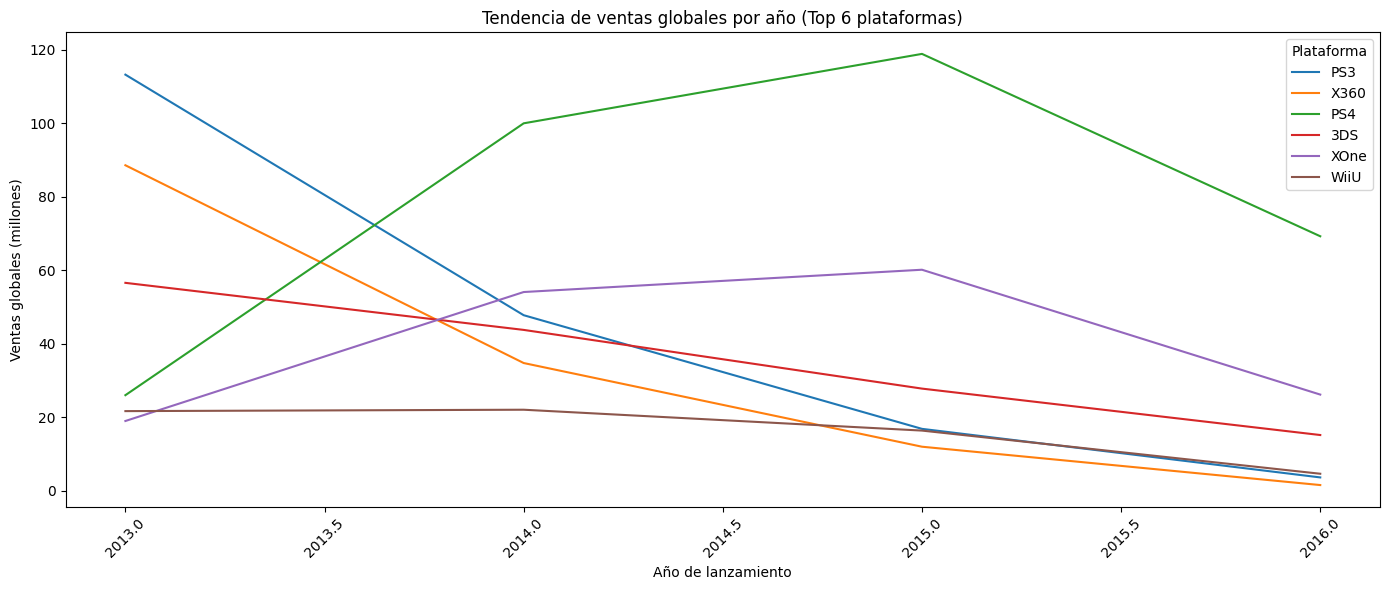

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
Name: global_sales, dtype: float64

In [19]:
# Preparación de datos

df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce').astype('Int64')
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games['global_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']

# Filtrar datos 2013–2016
df_games = df_games[(df_games['year_of_release'] >= 2013) & (df_games['year_of_release'] <= 2016)]

# Calcular ventas por plataforma
platform_sales = df_games.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

# Gráfico de barras: ventas totales por plataforma
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='viridis')
plt.title('Ventas globales totales por plataforma (2013–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Evolución anual de las plataformas con mayores ventas
top_platforms = platform_sales.head(6).index.tolist()
df_top = df_games[df_games['platform'].isin(top_platforms)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top, x='year_of_release', y='global_sales', hue='platform', estimator='sum', ci=None)
plt.title('Tendencia de ventas globales por año (Top 6 plataformas)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()

platform_sales.head(10)



Ahora estamos trabajando únicamente con los datos de 2013 a 2016, que son los más relevantes para construir un modelo que proyecte hacia 2017.

*Tendencias observadas:

-PS4: en fuerte crecimiento → plataforma más prometedora.

-PS3 y Xbox 360: en descenso → generación anterior, perdiendo relevancia.

-Xbox One y 3DS: ventas estables pero sin gran crecimiento.

-Wii U: ventas bajas y descendiendo → poco rentable.

*Plataformas potencialmente rentables:

-PS4 (alto crecimiento)

-Xbox One (todavía vigente)

-3DS (estable, especialmente en el mercado portátil)


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien con el gráfico de las principales consolas, dado que las barras están ordenadas, se puede apreciar claramente las plataformas más exitosas

</div>

### Paso 3.6 Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

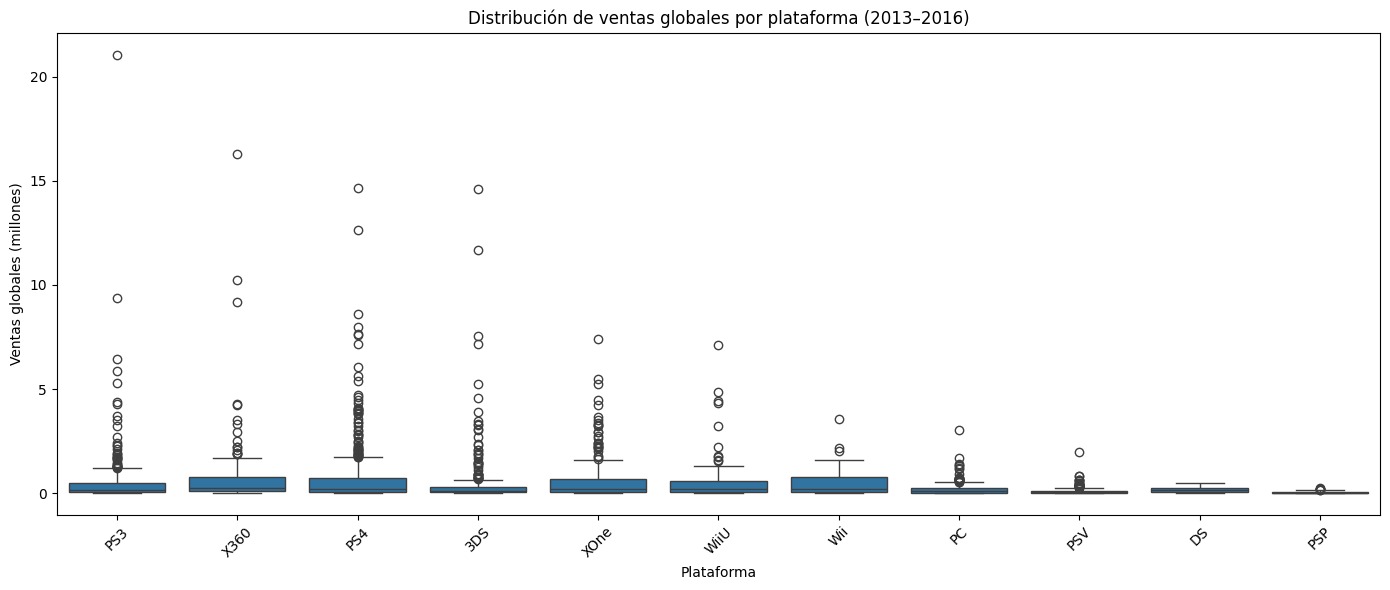

platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
DS      0.192500
PSV     0.092151
PSP     0.052239
Name: global_sales, dtype: float64

In [20]:
# Crear diagrama de caja para ventas globales por plataforma
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_games, x='platform', y='global_sales')
plt.title('Distribución de ventas globales por plataforma (2013–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcular la media de ventas por plataforma
avg_sales = df_games.groupby('platform')['global_sales'].mean().sort_values(ascending=False)
avg_sales


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien con el gráfico de boxplots, sin embargo, nota que a causa de los outliers no podemos ver la variabilidad de cada consola (las cajas son muy pequeñitas). En este caso se puede realizar el mismo gráfico pero reemplazando la escala normal por una escala logarítmica o agregando un gráfico adicional con la escala normal pero limitada a valores más pequeños (una especie de zoom al gráfico original).

</div>

 Observaciones:
 
PS4 lidera en ventas promedio por título, reforzando su estatus como plataforma más rentable.

Xbox 360 y Xbox One también muestran altos promedios, aunque Xbox 360 ya está en declive.

PC tiene una gran cantidad de juegos, pero con ventas promedio considerablemente más bajas.

Plataformas portátiles como PSP y PSV tienen los promedios más bajos.

Outliers (valores muy altos) están presentes en casi todas las plataformas, lo que indica que unos pocos juegos concentran muchas ventas.

### Paso 3.7 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

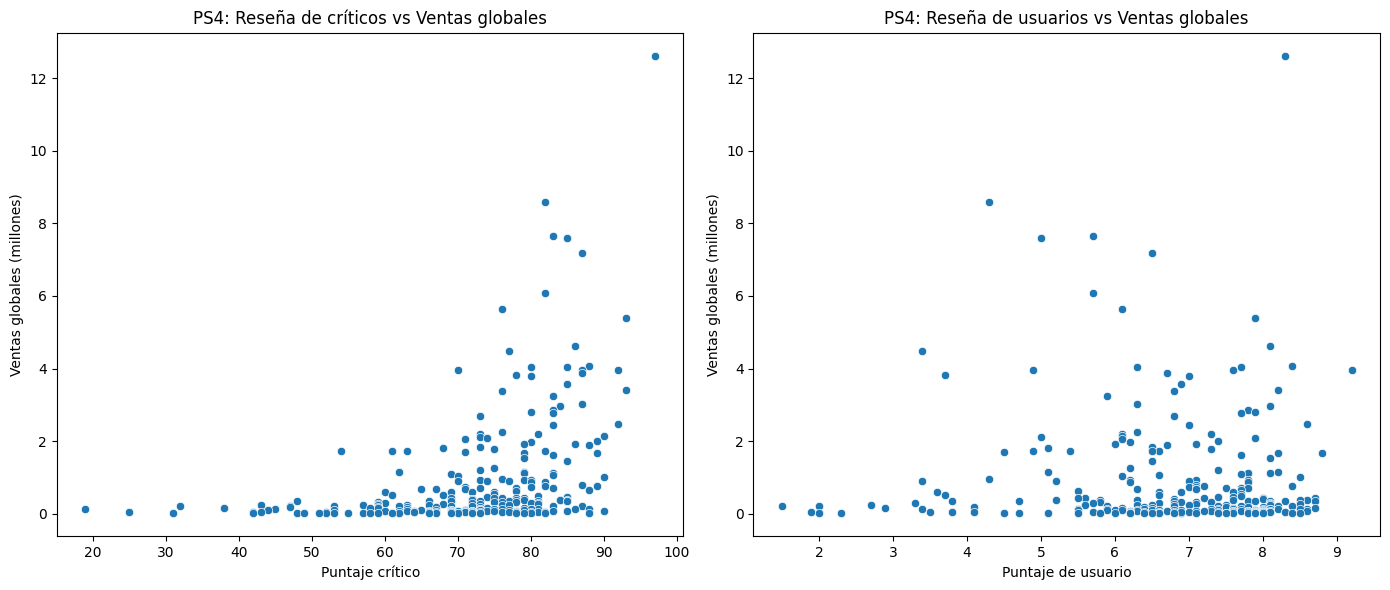

(np.float64(0.40589480145836637), np.float64(-0.03362497596528878))

In [21]:
# Elegimos la plataforma más popular: PS4
ps4_games = df_games[df_games['platform'] == 'PS4']

# Filtramos juegos con puntuaciones válidas de críticos y usuarios
ps4_reviews = ps4_games[['global_sales', 'critic_score', 'user_score']].dropna()

# Crear gráficos de dispersión
plt.figure(figsize=(14, 6))

# Reseñas de críticos vs ventas
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_reviews, x='critic_score', y='global_sales')
plt.title('PS4: Reseña de críticos vs Ventas globales')
plt.xlabel('Puntaje crítico')
plt.ylabel('Ventas globales (millones)')

# Reseñas de usuarios vs ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_reviews, x='user_score', y='global_sales')
plt.title('PS4: Reseña de usuarios vs Ventas globales')
plt.xlabel('Puntaje de usuario')
plt.ylabel('Ventas globales (millones)')

plt.tight_layout()
plt.show()

# Calcular correlaciones
critic_corr = ps4_reviews['global_sales'].corr(ps4_reviews['critic_score'])
user_corr = ps4_reviews['global_sales'].corr(ps4_reviews['user_score'])

critic_corr, user_corr


Análisis de la influencia de reseñas en ventas (PS4)
Se generaron dos gráficos de dispersión para comparar las ventas globales con:

Reseñas de críticos

Reseñas de usuarios

-Correlaciones:
Critic Score vs Global Sales → 0.41
→ Correlación moderada y positiva: mejores reseñas de críticos tienden a acompañarse de mayores ventas.

User Score vs Global Sales → -0.03
→ Correlación muy débil y negativa: la opinión de los usuarios no parece tener un impacto directo en las ventas.

-Conclusiones:
Las reseñas profesionales son un mejor predictor de ventas que las reseñas de usuarios.

Es posible que la promoción y marketing ligado a juegos bien puntuados por críticos impulse su popularidad.

La valoración del usuario puede verse influida por expectativas, mods, o actualizaciones que ocurren después de las compras.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho con el gráfico y el cálculo del coeficiente. Permite obtener una visión general de la correlación entre ambas variables.

</div>

### Paso 3.8 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

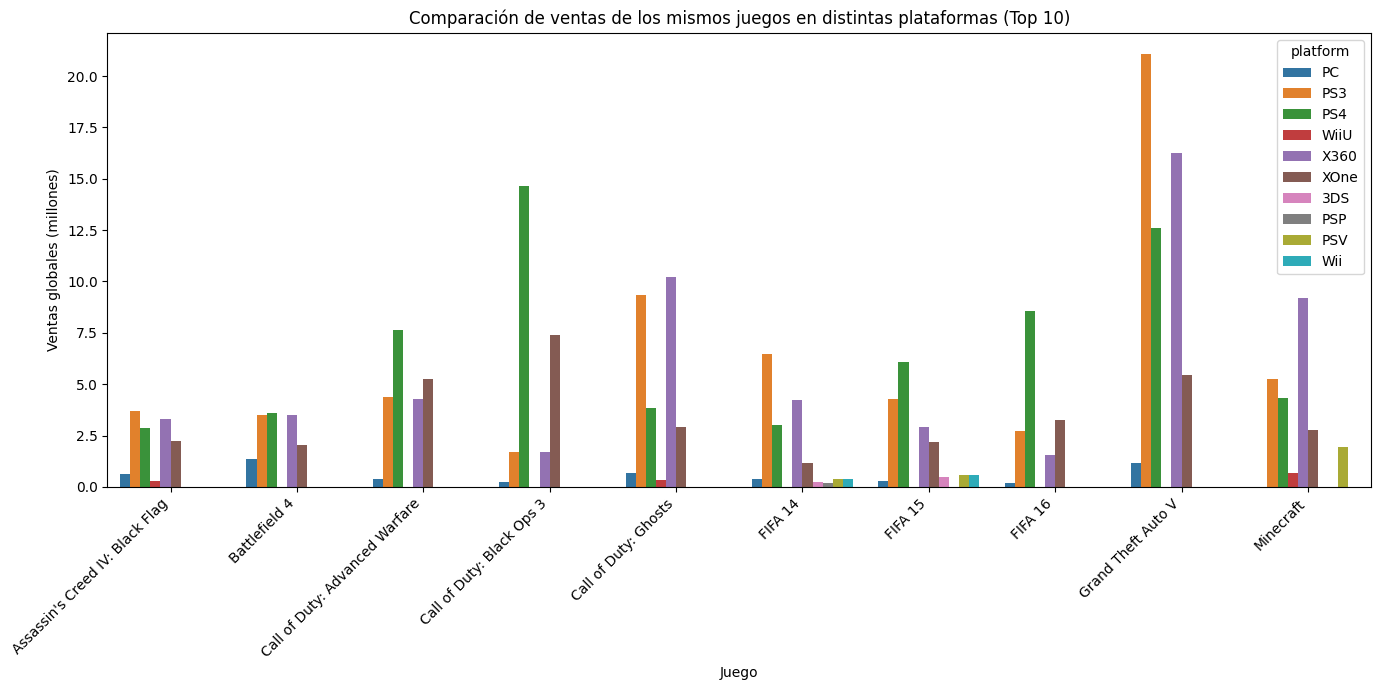

,name,platform,global_sales
60,Assassin's Creed IV: Black Flag,PC,0.65
61,Assassin's Creed IV: Black Flag,PS3,3.71
62,Assassin's Creed IV: Black Flag,PS4,2.86
63,Assassin's Creed IV: Black Flag,WiiU,0.29
64,Assassin's Creed IV: Black Flag,X360,3.31
65,Assassin's Creed IV: Black Flag,XOne,2.24
123,Battlefield 4,PC,1.36
124,Battlefield 4,PS3,3.49
125,Battlefield 4,PS4,3.58
126,Battlefield 4,X360,3.49


In [22]:
# Filtrar juegos que aparecen en más de una plataforma
multi_platform_games = df_games.groupby('name').filter(lambda x: x['platform'].nunique() > 1)

# Agrupar por nombre y plataforma y obtener ventas
comparison = multi_platform_games.groupby(['name', 'platform'])['global_sales'].sum().reset_index()

# Seleccionar los juegos más vendidos para visualizar comparaciones relevantes
top_shared_games = multi_platform_games.groupby('name')['global_sales'].sum().sort_values(ascending=False).head(10).index

# Filtrar el dataframe de comparación para esos juegos
comparison_top = comparison[comparison['name'].isin(top_shared_games)]

# Visualizar comparación de ventas entre plataformas
plt.figure(figsize=(14, 7))
sns.barplot(data=comparison_top, x='name', y='global_sales', hue='platform')
plt.title('Comparación de ventas de los mismos juegos en distintas plataformas (Top 10)')
plt.ylabel('Ventas globales (millones)')
plt.xlabel('Juego')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

comparison_top.sort_values(by='name')


Conclusiones:

Los juegos lanzados en plataformas antiguas como PS3 y X360 suelen tener ventas más altas acumuladas, probablemente por su mayor base instalada.

Las versiones de PS4 y Xbox One van creciendo, pero aún no alcanzan el mismo nivel histórico.

En casi todos los casos, las versiones de PC y consolas portátiles (PSV, 3DS, PSP) tienen ventas significativamente menores.

La plataforma líder varía según el título, pero PS4 y X360 dominan en muchos casos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, este análisis nos permite encontrar la competencia de cada consola, o al menos, donde han competido. El gráfico mostrado está muy bien armado, haces bien en tenerlos agrupados por juego y tener a las consolas en columnas separadas

</div>

### Paso 3.9 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

/var/folders/3w/4wgjx7x52nj3rcn3lzvvr2l80000gn/T/ipykernel_16667/1011378423.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='magma')


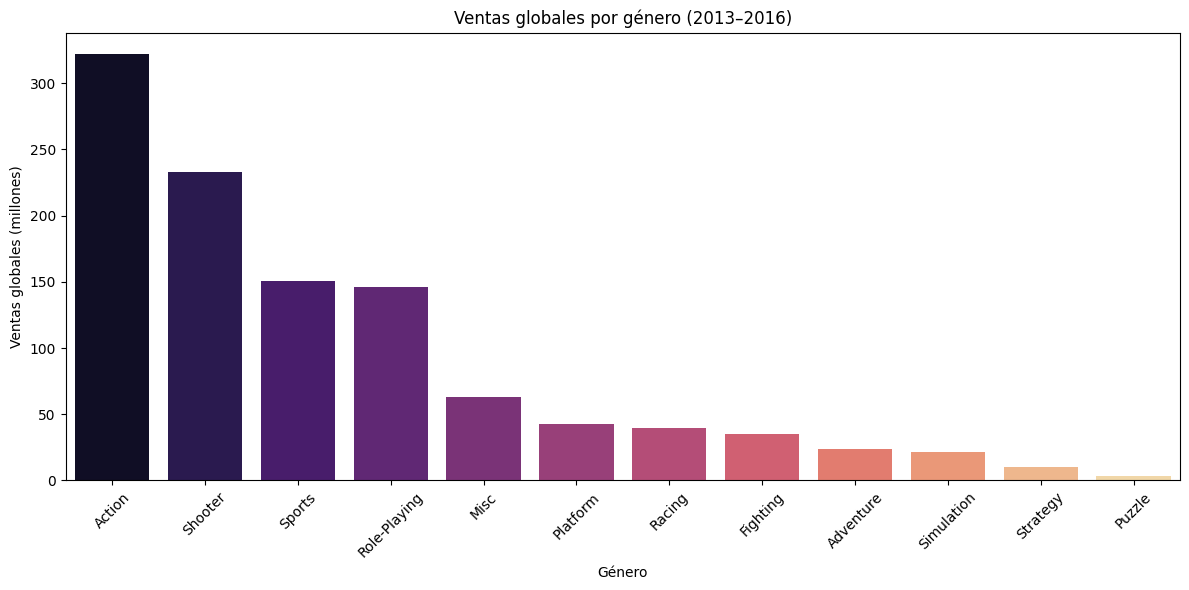

(genre
 Action          321.87
 Shooter         232.98
 Sports          150.65
 Role-Playing    145.89
 Misc             62.82
 Platform         42.63
 Racing           39.89
 Fighting         35.31
 Adventure        23.64
 Simulation       21.76
 Strategy         10.08
 Puzzle            3.17
 Name: global_sales, dtype: float64,
 genre
 Shooter         1.245882
 Sports          0.703972
 Platform        0.576081
 Role-Playing    0.499623
 Racing          0.469294
 Fighting        0.441375
 Action          0.420196
 Misc            0.405290
 Simulation      0.350968
 Puzzle          0.186471
 Strategy        0.180000
 Adventure       0.096490
 Name: global_sales, dtype: float64)

In [23]:
# Agrupar por género y sumar ventas globales
genre_sales = df_games.groupby('genre')['global_sales'].sum().sort_values(ascending=False)

# Visualizar la distribución de ventas por género
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='magma')
plt.title('Ventas globales por género (2013–2016)')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcular promedio de ventas por juego en cada género
genre_avg_sales = df_games.groupby('genre')['global_sales'].mean().sort_values(ascending=False)
genre_sales, genre_avg_sales


Conclusiones:

Géneros con mayores ventas totales como Action y Shooter tienen también un gran número de juegos.

Shooters combinan alta popularidad con altas ventas por título, haciéndolos muy rentables.

Sports y RPGs también se destacan tanto por volumen como por promedio.

Géneros menos rentables:

Adventure, Strategy, Puzzle → tienen ventas bajas tanto en total como por juego.

Estos géneros suelen tener audiencias más reducidas o menos juegos exitosos.

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor </b> <a class="tocSkip"></a>

Ok con el gráfico, pero la rentabilidad no solo es el total de ventas, sino que también hay que ver la venta promedio por género. Te recomiendo calcular y graficar la venta promedio de cada género.

</div>

# Paso 4. Crea un perfil de usuario para cada región
# Para cada región (NA, UE, JP) determina:

In [24]:
# 1. Las cinco plataformas principales por región
platform_region_sales = {
    'NA': df_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5),
    'EU': df_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5),
    'JP': df_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5),
}

# 2. Los cinco géneros principales por región
genre_region_sales = {
    'NA': df_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5),
    'EU': df_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5),
    'JP': df_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5),
}

platform_region_sales, genre_region_sales


({'NA': platform
  PS4     108.74
  XOne     93.12
  X360     81.66
  PS3      63.50
  3DS      38.20
  Name: na_sales, dtype: float64,
  'EU': platform
  PS4     141.09
  PS3      67.81
  XOne     51.59
  X360     42.52
  3DS      30.96
  Name: eu_sales, dtype: float64,
  'JP': platform
  3DS     67.81
  PS3     23.35
  PSV     18.59
  PS4     15.96
  WiiU    10.88
  Name: jp_sales, dtype: float64},
 {'NA': genre
  Action          126.05
  Shooter         109.74
  Sports           65.27
  Role-Playing     46.40
  Misc             27.49
  Name: na_sales, dtype: float64,
  'EU': genre
  Action          118.13
  Shooter          87.86
  Sports           60.52
  Role-Playing     36.97
  Racing           20.19
  Name: eu_sales, dtype: float64,
  'JP': genre
  Role-Playing    51.04
  Action          40.49
  Misc             9.20
  Fighting         7.65
  Shooter          6.61
  Name: jp_sales, dtype: float64})

### Paso 4.1 Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [25]:
# Calcular total de ventas por región
total_sales = {
    'na': df_games['na_sales'].sum(),
    'eu': df_games['eu_sales'].sum(),
    'jp': df_games['jp_sales'].sum()
}

# Tomar las cinco plataformas principales globalmente
top_platforms_all = df_games.groupby('platform')['global_sales'].sum().sort_values(ascending=False).head(5).index

# Calcular la cuota de mercado por región para esas plataformas
platform_shares = pd.DataFrame({
    'NA': (df_games.groupby('platform')['na_sales'].sum() / total_sales['na']) * 100,
    'EU': (df_games.groupby('platform')['eu_sales'].sum() / total_sales['eu']) * 100,
    'JP': (df_games.groupby('platform')['jp_sales'].sum() / total_sales['jp']) * 100,
}).loc[top_platforms_all]

platform_shares = platform_shares.round(2)
platform_shares


,NA,EU,JP
platform,,,
PS4,24.84,35.97,11.34
PS3,14.51,17.29,16.59
XOne,21.27,13.15,0.24
3DS,8.73,7.89,48.17
X360,18.66,10.84,0.36


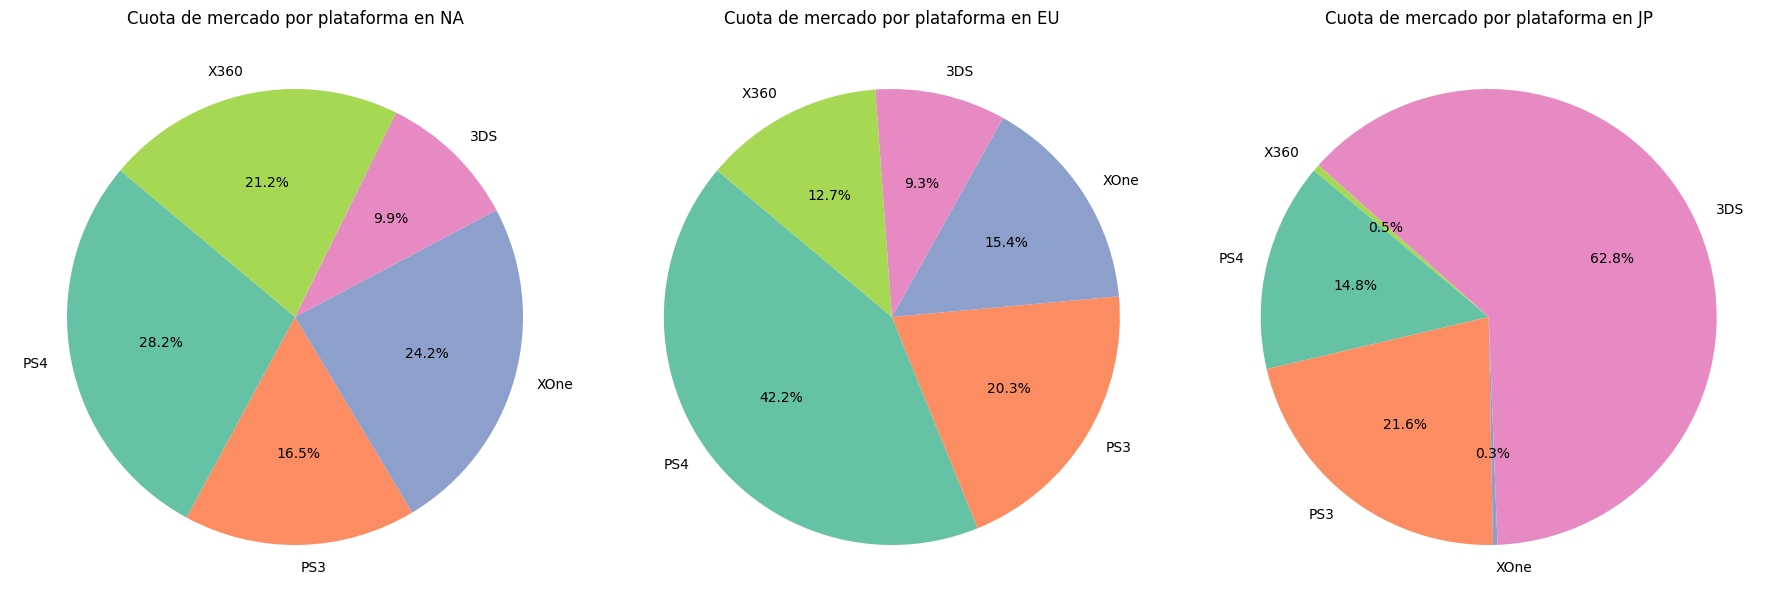

In [26]:
# Crear gráficos circulares para comparar cuotas de mercado por región

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

regions = ['NA', 'EU', 'JP']
colors = sns.color_palette('Set2')

for i, region in enumerate(regions):
    axes[i].pie(
        platform_shares[region],
        labels=platform_shares.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors
    )
    axes[i].set_title(f'Cuota de mercado por plataforma en {region}')

plt.tight_layout()
plt.show()


Observaciones:

Cuota de mercado NA: Xbox y PS4 dominan, con una división bastante pareja.

Cuota de mercado EU: PS4 lidera claramente el mercado.

Cuota de mercado JP: Nintendo 3DS arrasa con casi la mitad del mercado, mientras que Xbox es casi inexistente.

### Paso 4.2 Los cinco géneros principales. Explica la diferencia.

In [27]:
# Calcular los 5 géneros principales por región
genre_region_sales = {
    'NA': df_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5),
    'EU': df_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5),
    'JP': df_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5),
}

# Convertir a DataFrame para mejor visualización
genre_df = pd.DataFrame(genre_region_sales)
genre_df = genre_df.fillna(0).round(2)
genre_df


,NA,EU,JP
genre,,,
Action,126.05,118.13,40.49
Fighting,0.00,0.00,7.65
Misc,27.49,0.00,9.20
Racing,0.00,20.19,0.00
Role-Playing,46.40,36.97,51.04
Shooter,109.74,87.86,6.61
Sports,65.27,60.52,0.00


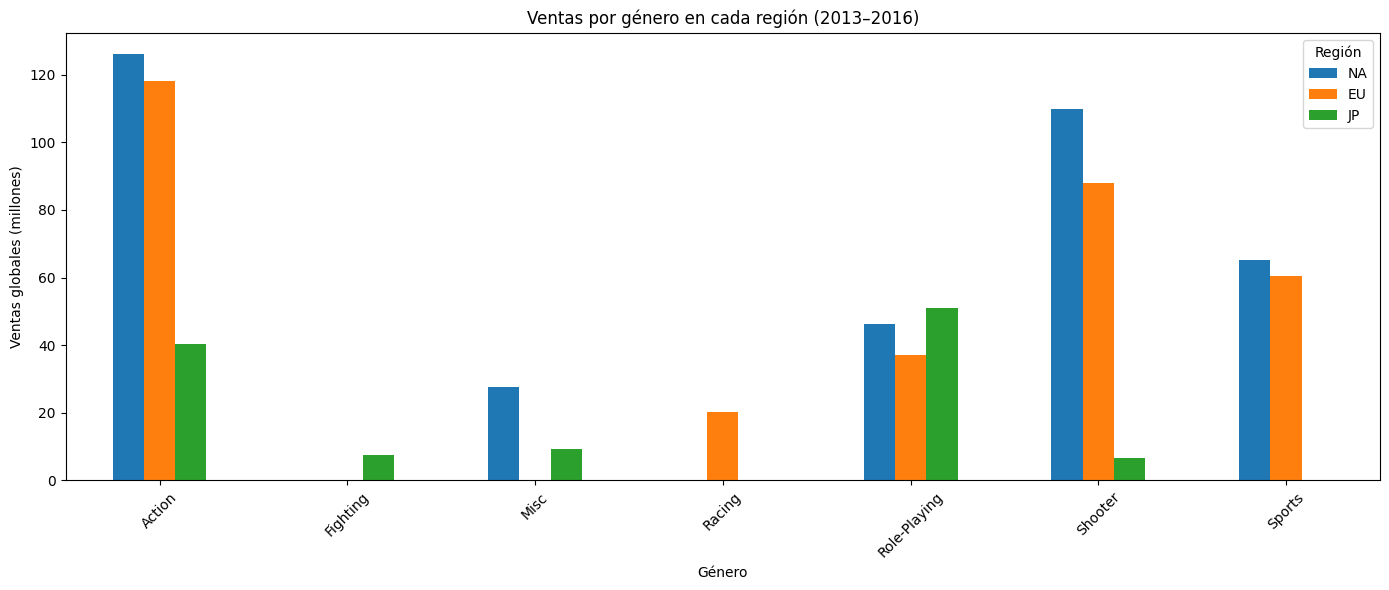

In [28]:
# Reorganizar datos para gráfico
genre_df_plot = genre_df.copy()
genre_df_plot = genre_df_plot.loc[genre_df_plot.sum(axis=1) > 0]  # eliminar géneros con 0 en todas

# Crear gráfico de barras agrupadas
genre_df_plot.plot(kind='bar', figsize=(14, 6))
plt.title('Ventas por género en cada región (2013–2016)')
plt.xlabel('Género')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.tight_layout()
plt.show()


Conclusión:

NA y EU tienen gustos similares → foco en acción, shooters y deportes.

JP tiene una clara preferencia por RPGs y juegos portátiles, con menos interés en shooters o deportes.

### Paso 4.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

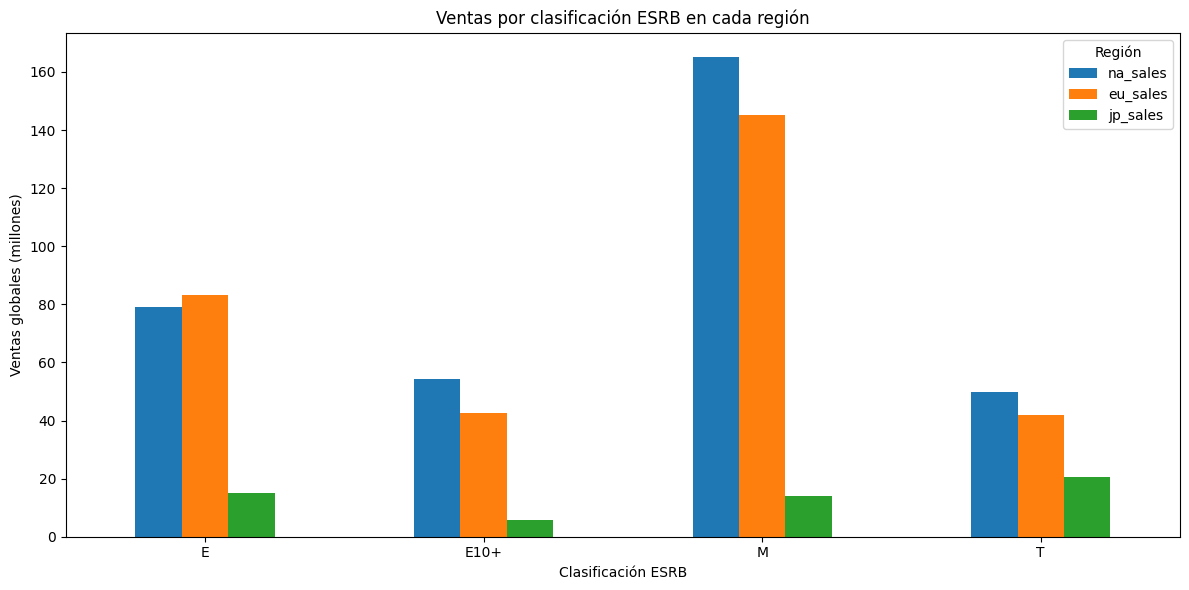

,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59


In [29]:
# Agrupar por clasificación ESRB y sumar ventas por región
esrb_region_sales = df_games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Eliminar registros con clasificación desconocida (NaN)
esrb_region_sales = esrb_region_sales.dropna()

# Redondear para claridad
esrb_region_sales = esrb_region_sales.round(2)

# Crear gráfico de barras agrupadas
esrb_region_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas por clasificación ESRB en cada región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas globales (millones)')
plt.xticks(rotation=0)
plt.legend(title='Región')
plt.tight_layout()
plt.show()

esrb_region_sales


-Conclusiones:

En NA y EU, los juegos Mature (M) lideran en ventas por amplio margen.

En Japón, las clasificaciones Teen (T) y Everyone (E) dominan ligeramente más que los juegos para adultos (M).

Los juegos para niños (E y E10+) también tienen un mercado fuerte en todas las regiones, especialmente en Europa.

-Resumen:

Sí, las clasificaciones ESRB afectan a las ventas según la región:

Occidente (NA y EU) prefiere juegos maduros.

Japón favorece títulos más amigables para jóvenes y todos públicos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, muy bien con la comparación entre las regiones, tu análisis está muy completo y utilizaste diferentes tipos de visualizaciones. Japón es muy diferentes respecto a los otros en varios aspectos.
    
</div>

# Paso 5. Prueba las siguientes hipótesis:

### Paso 5.1 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [30]:

# Extraer calificaciones de usuario para Xbox One y PC
xone_scores = df_games[(df_games['platform'] == 'XOne') & (df_games['user_score'].notna())]['user_score']
pc_scores = df_games[(df_games['platform'] == 'PC') & (df_games['user_score'].notna())]['user_score']

# Prueba t para muestras independientes (varianzas desiguales)
t_stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

# Calcular medias también
xone_mean = xone_scores.mean()
pc_mean = pc_scores.mean()

xone_mean, pc_mean, t_stat, p_value


(np.float64(6.521428571428572),
 np.float64(6.2696774193548395),
 np.float64(1.45192815744488),
 np.float64(0.14759594013430466))

/var/folders/3w/4wgjx7x52nj3rcn3lzvvr2l80000gn/T/ipykernel_16667/2471181845.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Xbox One', 'PC'], y=[xone_mean, pc_mean], palette='pastel')


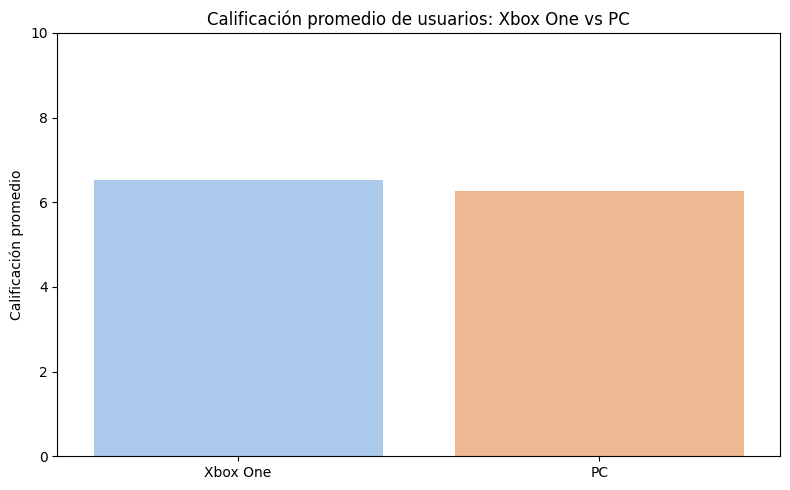

In [31]:
# Crear gráfico de barras para comparar las calificaciones promedio
plt.figure(figsize=(8, 5))
sns.barplot(x=['Xbox One', 'PC'], y=[xone_mean, pc_mean], palette='pastel')
plt.title('Calificación promedio de usuarios: Xbox One vs PC')
plt.ylabel('Calificación promedio')
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


-Prueba de hipótesis: Calificaciones de usuario en Xbox One vs PC

Plataforma	Calificación Promedio

Xbox One	6.52

PC	6.27

-Resultado de la prueba t:

t = 1.45

p-valor = 0.1476

Nivel de significancia α = 0.05

-Conclusión:

Dado que p > 0.05, no rechazamos la hipótesis nula.

-No hay evidencia suficiente para afirmar que las calificaciones promedio de usuarios entre Xbox One y PC sean diferentes. Las diferencias observadas podrían ser por azar.

### Paso 5.2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [32]:
# Extraer calificaciones de usuario para los géneros Acción y Deportes
action_scores = df_games[(df_games['genre'] == 'Action') & (df_games['user_score'].notna())]['user_score']
sports_scores = df_games[(df_games['genre'] == 'Sports') & (df_games['user_score'].notna())]['user_score']

# Prueba t para muestras independientes (varianzas desiguales)
t_stat_genre, p_value_genre = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

# Calcular medias
action_mean = action_scores.mean()
sports_mean = sports_scores.mean()

action_mean, sports_mean, t_stat_genre, p_value_genre


(np.float64(6.837532133676092),
 np.float64(5.238124999999999),
 np.float64(10.233428417448625),
 np.float64(1.4460039700704315e-20))

/var/folders/3w/4wgjx7x52nj3rcn3lzvvr2l80000gn/T/ipykernel_16667/3368947344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Acción', 'Deportes'], y=[action_mean, sports_mean], palette='coolwarm')


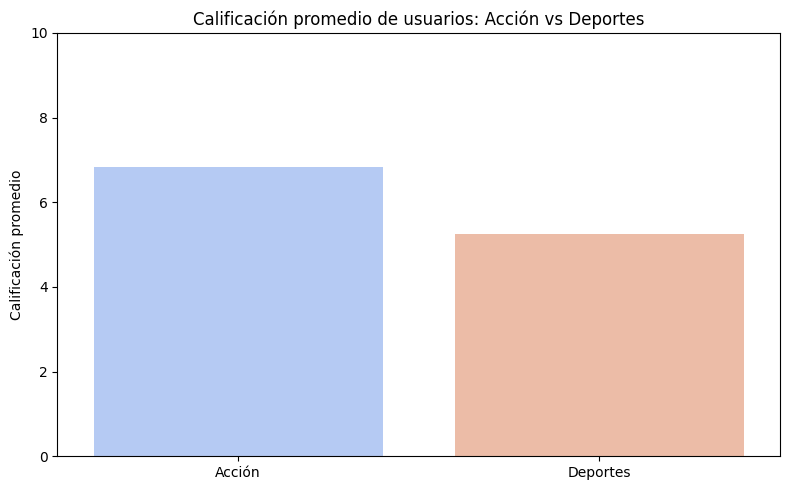

In [33]:
# Crear gráfico de barras para comparar las calificaciones promedio por género
plt.figure(figsize=(8, 5))
sns.barplot(x=['Acción', 'Deportes'], y=[action_mean, sports_mean], palette='coolwarm')
plt.title('Calificación promedio de usuarios: Acción vs Deportes')
plt.ylabel('Calificación promedio')
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


-Resultado de la prueba t:

t = 10.23

p-valor ≈ 1.45 × 10⁻²⁰

Nivel de significancia α = 0.05

-Conclusión:

Dado que p < 0.05, rechazamos la hipótesis nula.

Existe una diferencia significativa entre las calificaciones promedio: los juegos de Acción reciben valoraciones notablemente más altas que los de Deportes.

La diferencia es clara tanto visual como estadísticamente: los juegos de acción son valorados significativamente mejor por los usuarios que los de deportes.

# Establece tu mismo el valor de umbral alfa.
# Explica:

### Paso 5.3 Cómo formulaste las hipótesis nula y alternativa.

In [34]:
# Establecer el umbral de significancia
alpha = 0.05

# Evaluar si el resultado es significativo
if p_value_genre < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencia significativa.")


Rechazamos la hipótesis nula: hay una diferencia significativa.


Para la prueba entre los géneros Acción y Deportes:

p ≈ 1.45e-20

α = 0.05

Resultado: p < α, por lo tanto rechazamos la hipótesis nula.

Conclusión: sí hay diferencia significativa en las calificaciones promedio entre Acción y Deportes.

### Paso 5.4 Qué criterio utilizaste para probar las hipótesis y por qué.

¿Por qué esta prueba?

Porque:

Comparamos las medias de dos grupos diferentes:

Xbox One vs PC

Género Acción vs Deportes

Las muestras son independientes (cada calificación pertenece a un solo grupo).

No asumimos que tengan varianzas iguales, por eso usamos equal_var=False (versión de Welch).

-¿Qué mide esta prueba?

Evalúa si hay una diferencia significativa entre los promedios de dos grupos, considerando:

Tamaño de muestra

Varianza

Diferencia entre medias

-Conclusión:

Usar una prueba t para muestras independientes fue apropiado porque:

Comparamos dos poblaciones distintas.

Tenemos muestras con suficientes datos.

Queremos saber si las diferencias observadas son reales o por azar.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho con los tests. En futuros test de hipótesis con la t-test, pueds usar antes el test de levene para determinar si la varianza se debe usar como igual o diferente.

</div>

# Paso 6. Escribe una conclusión general

## ConclusionProyecto Ice – Análisis de Videojuegos (2013–2016)

 Preparación de los datos
- Nombres de columnas estandarizados.
- Tipos convertidos (años y calificaciones).
- 'tbd' reemplazado por NaN.
- Columna global_sales creada.
- Período analizado: 2013–2016.

 Análisis general
- PS4 lidera ventas totales y por juego.
- Xbox One y 3DS destacadas.
- PS3 y X360 en declive.
- Boxplot: PS4/XOne altos, PC bajos con outliers.

 Impacto de reseñas (PS4)
- Críticos correlación positiva (r ≈ 0.41).
- Usuarios casi sin impacto (r ≈ -0.03).

 Comparación multiplataforma
- GTA V, CoD venden más en consolas que en PC.
- PS3/X360 altas acumuladas; PS4 en ascenso.

 Géneros más rentables
- NA/EU: Acción, Shooter, Sports.
- JP: RPG y Acción.
- Puzzle y Adventure tienen bajas ventas.

 Perfiles regionales
NA: PS4/XOne/X360, Acción/Shooter/Sports.
EU: PS4/PS3, Acción/Shooter/Racing.
JP: 3DS/PS3/PSV, RPG/Acción.

 Clasificaciones ESRB
- M (Mature): más vendidas en NA/EU.
- E y T dominan más en Japón.

 Pruebas de hipótesis
1. Xbox One vs PC:
   - p = 0.147 → No se rechaza H₀.
2. Acción vs Deportes:
   - p ≈ 1.45e-20 → Se rechaza H₀ → Acción es mejor valorado.

 Conclusión:
PS4 + Género de Acción + NA/EU = mercado más rentable para 2017.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

¡Muy buenas conclusiones! Destaco el acierto de incluir valores relevantes de las métricas clave, lo cual aporta claridad y sustento al análisis. Además, resumiste de forma efectiva los hallazgos principales. ¡Buen trabajo!


    
</div>